In [1]:
import os
import sys
import gin
import numpy as np
import pandas as pd
from IPython.core.display import clear_output, display
from ariadne.graph_net.graph_utils.graph_prepare_utils import to_pandas_graph_from_df, get_pd_line_graph, \
    apply_nodes_restrictions, apply_edge_restriction, construct_output_graph
from ariadne.transformations import Compose, ConstraintsNormalize, ToCylindrical
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload

%autoreload 2

C:\Miniconda3\envs\ariadne_gpu\lib\site-packages\pytorch_lightning\utilities\distributed.py:37: UserWarning: Unsupported `ReduceOp` for distributed computing.
  warnings.warn(*args, **kwargs)


In [8]:
from matplotlib import collections  as mc



def visualize_2d_points_from_out( x, y, col, show=False, ax_in=None, 
                                 scatter_kwargs=None):    
    if ax_in is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    else:
        ax = ax_in
    scatter_kwargs = {} if scatter_kwargs is None else scatter_kwargs
    ax.scatter(x, y, c=col, **scatter_kwargs)
    if show:
        plt.tight_layout()
        plt.show()
        return
    return ax

In [9]:
from ariadne.point_net.point.points import load_points
event = load_points("../output/cgem_points_test/points_3.txt_1.npz")
event

Points(X=array([[ 0.48952582,  0.48952582,  0.4895258 ,  0.4895258 ,  0.4895258 ,
         0.4895258 ,  0.4895258 ,  0.4895258 ,  0.4895258 ,  0.4895258 ,
         0.4895258 ,  0.4895258 ,  0.4895258 ,  0.48952585,  0.48952585,
         0.4895258 ,  0.4895258 ,  0.75663286,  0.75663286,  0.75663286,
         0.75663286,  0.7566327 ,  0.7566327 ,  0.7566327 ,  0.7566327 ,
         0.7566329 ,  0.7566329 ,  0.7566329 ,  0.7566329 ,  0.75663275,
         0.7566327 ,  0.7566327 ,  0.7566327 ,  0.7566327 ,  0.7566326 ,
         0.7566326 ,  0.7566326 ,  0.7566326 ,  0.9997297 ,  0.9997297 ,
         0.9997297 ,  0.9997297 ,  0.99972993,  0.99972993,  0.99972993,
         0.99972993,  0.9997299 ,  0.9997299 ,  0.9997299 ,  0.9997299 ,
         0.9997298 ,  0.9997298 ,  0.9997298 ,  0.9997298 ,  0.9997298 ,
         0.9997298 ,  0.9997298 ,  0.9997298 ,  0.9997298 ,  0.4895258 ,
         0.7566329 ,  0.9997299 ,  0.4895258 ,  0.75663275,  0.9997298 ,
         0.4895258 ,  0.7566327 ,  0.99972

In [10]:
X, track = event
true_points = X[:, track == 1]
false_points = X[:, track != 1]


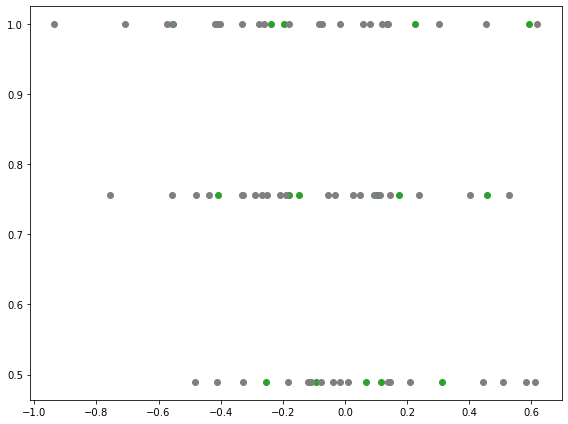

In [11]:
ax = visualize_2d_points_from_out(true_points[2],true_points[0], 'tab:green')
visualize_2d_points_from_out(false_points[2],false_points[0], 'tab:gray', show=True, ax_in=ax)

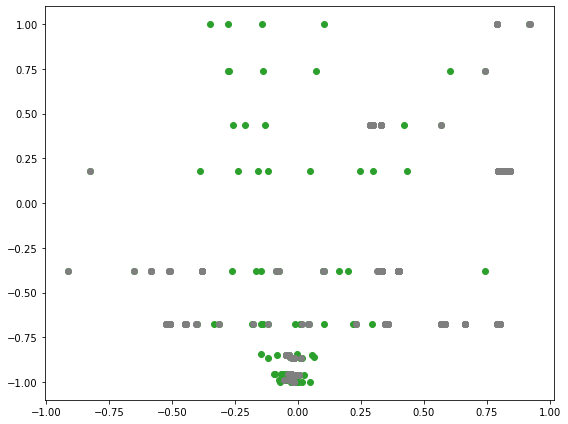

In [12]:
from ariadne.point_net.point.points import load_points
event = load_points("../output/bmn7_points_test/points_1.txt_1.npz")
X, track = event
true_points = X[:, track == 1]
false_points = X[:, track != 1]
ax = visualize_2d_points_from_out(true_points[0],true_points[2], 'tab:green')
visualize_2d_points_from_out(false_points[0],false_points[2], 'tab:gray', show=True, ax_in=ax)